In [631]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the dataset from the file Ecommerce.csv

```
This dataset includes the following data for 200 online customers:

- Email
- Adress
- Avatar
- Avg Session Length (everage time they spent on usage)
- Time on App (time they spent using the application)
- Time on Website (time they spent using the website)
- Length of Membership (for how long they have been a user)
- Yearly Amount Spent (how much money they spend yearly)

Yout goal will be to estimate the value of the Yearly Amount Spent using the feature(s) of the users
```

In [632]:
ds = pd.read_csv('Ecommerce.csv')
ds

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872Lake Jamiefurt, U...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497West Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633South Chadburgh, TN...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808Brendachester, TX 0...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


### Get rid of non-numerical columns of the dataset

In [633]:
ds = ds._get_numeric_data()
ds

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


### Use Yearly Amount Spent as your target variable. Plot the relationship of each of the numerical features with the target variable

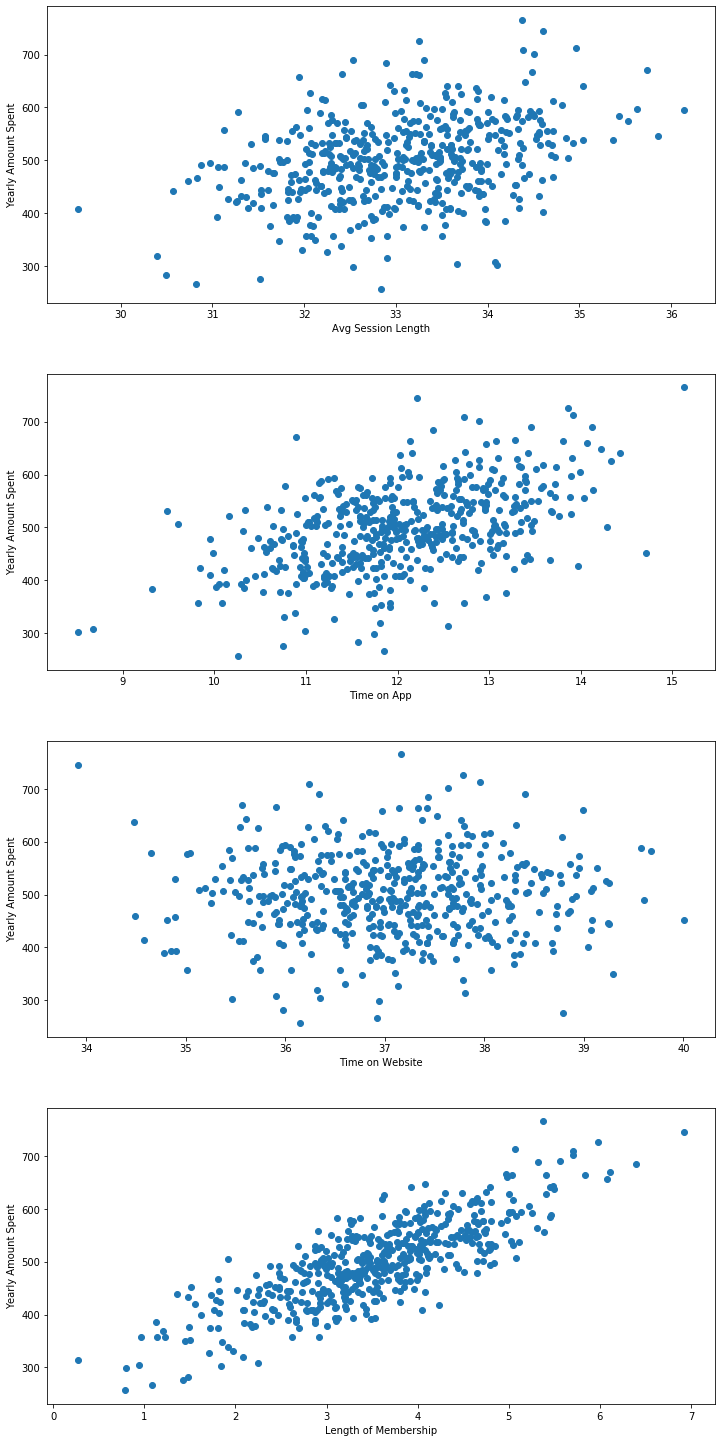

In [634]:
fig, axs = plt.subplots(len(ds.columns)-1)
fig.set_figwidth(10)
fig.set_figheight(20)
fig.tight_layout(h_pad = 5)

for item in range(len(ds.columns)-1):
    axs[item].scatter(ds[ds.columns[item]], ds['Yearly Amount Spent'])
    axs[item].set_xlabel(ds.columns[item])
    axs[item].set_ylabel('Yearly Amount Spent')

### Leave only one feature that has a linear relationship with the target variable.

In [635]:
new = ds[['Length of Membership','Yearly Amount Spent']]
new

,Length of Membership,Yearly Amount Spent
0,4.082621,587.951054
1,2.664034,392.204933
2,4.104543,487.547505
3,3.120179,581.852344
4,4.446308,599.406092
...,...,...
495,3.746573,573.847438
496,3.576526,529.049004
497,4.958264,551.620145
498,2.336485,456.469510


### Divide the dataset into training and test sets with the ratio 80:20.

In [636]:
new = new.sample(frac=1).reset_index(drop = True)
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(new[['Length of Membership']],new['Yearly Amount Spent'], test_size=0.2, random_state=42)

In [637]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [638]:
xTrain

,Length of Membership
249,3.532862
433,5.066697
19,5.976768
322,2.685285
332,4.343063
...,...
106,4.330407
270,3.516051
348,5.453969
435,4.051382


In [639]:
yTrain

249    478.600916
433    712.396327
19     725.584814
322    529.056663
332    588.712606
          ...    
106    581.308933
270    487.646232
348    640.786166
435    561.516532
102    533.396554
Name: Yearly Amount Spent, Length: 400, dtype: float64

### Use the resulting train and test sets with the next 2 functions to fit linear regression and plot the resulting regression line.

The first function is `fit_1d_linear_regression` that takes two vectors $x$ and $y$, and returns a numpy array ($\beta_0, \beta_1)$, where $\beta_0$ is the intercept of the line, and $\beta_1$ is the slope. 

In [640]:
def fit_1d_linear_regression(data_vector, response_vector):
    """
    :param data_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x)
    :param response_vector: A pandas series object (i.e. a column of a dataframe),
                        where each element is label (y)
    :return: numpy array beta of coefficients of the regression
    
    Note: You can avoid the intercept for simplicity 
    or include the intercept for an extra point
    """
    xVector = data_vector
    xVector['1'] = 1
    xVector = xVector[['1','Length of Membership']]
    xArray = np.array(xVector)
    ans = np.linalg.inv(xArray.T.dot(xArray))
    ans = ans.dot(xArray.T).dot(response_vector)
    xVector = data_vector
    return ans

The second function is `plot_line` function, that takes $\beta_0, \beta_1, x, y$ and plots a scatter plot of the data, and the line $y = \beta_0 + \beta_1 x$. And saves the plot in `YOURNAME.png`

In [641]:
def plot_fitted_line(
                     x,
                     y,
                     username: str,
                     b1 = 0,
                     b0 = 0):
    """
    :param b0: Intersept of line to plot
    Note: avoid this if you don't have an intercept in the previous function
    :param b1: Slope of the line to plot
    :param x: A pandas series object (i.e. a column of a dataframe),
                        where each element is a data point (x coordinates)
    :param y: A pandas series object (i.e. a column of a dataframe),
                        where each element is a label (y coordinates)
    """
    plt.plot(x, b0 + b1 * x, color = 'c')
    plt.scatter(x, y, 5, color = 'r')
    plt.title('Regression line Length of Membership VS Yearly Amount Spent')
    plt.xlabel("Length of Membership")
    plt.ylabel("Yearly Amount Spent")
    plt.savefig('myplot.png')
    plt.show()
    pass

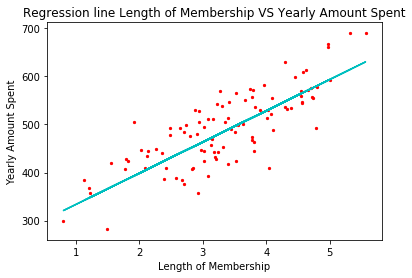

coefficient: 64.84410337571475 
intercept: 268.96783217942254


In [642]:
b0, b1 = fit_1d_linear_regression(xTrain,yTrain)
xTrain = xTrain.drop(['1'],axis = 1)
plot_fitted_line(xTest, yTest,'Shushan',b1,b0)
print('coefficient:',b1, '\nintercept:',b0)

### Plot example

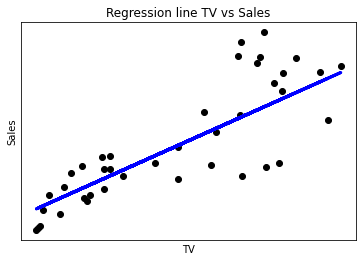

### Now fit the linear regression to the data containing only 1 feature using sklearn and compare the results with your own fit_1d_linear_regression function

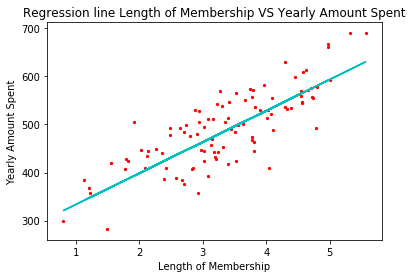

coefficient: [64.84410338] 
intercept: 268.9678321794239


In [643]:
reg = linear_model.LinearRegression()
reg.fit(xTrain, yTrain)
b0_s, b1_s = reg.intercept_, reg.coef_
plot_fitted_line(xTest, yTest,'Shushan',b1_s,b0_s)
print('coefficient:',b1_s, '\nintercept:',b0_s)

### Use sklearn.metrics to calculate Mean absolute error, Mean squared error, Root mean squared error and R-squared for the results of your own function vs the sklearn regression results. Try to interprete your results.

In [644]:
yTest_pred1 = reg.predict(xTest)
yTest_pred1 = reg.predict(xTest.values.reshape(-1,1))
yTest_pred = b0 + b1 * xTest
print('MSE: ', mean_squared_error(yTest, yTest_pred),'\nMSE sklearn: ', mean_squared_error(yTest, yTest_pred1))
print('\nMAE: ', mean_absolute_error(yTest, yTest_pred),'\nMAE sklearn: ', mean_absolute_error(yTest, yTest_pred1))
print('\nRMSE: ', np.sqrt(mean_squared_error(yTest, yTest_pred)),'\nRMSE sklearn: ', np.sqrt(mean_squared_error(yTest, yTest_pred1)))
print('\nR-Squared: ', r2_score(yTest, yTest_pred),'\nR-Squared sklearn: ', r2_score(yTest, yTest_pred1))

MSE:  2273.461209502864 
MSE sklearn:  2273.4612095028556

MAE:  39.65336577402529 
MAE sklearn:  39.653365774025204

RMSE:  47.68082643477212 
RMSE sklearn:  47.68082643477204

R-Squared:  0.6368657057151403 
R-Squared sklearn:  0.6368657057151417


### Fit linear regression to the data containing all numerical features using sklearn and use the same metrics to evaluate how good the model is.

In [645]:
ds

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [646]:
reg2 = linear_model.LinearRegression()

In [647]:
Features = ds.drop(['Yearly Amount Spent'], axis = 1)
Labels = ds['Yearly Amount Spent']
xTrain, xTest, yTrain, yTest = train_test_split(Features, Labels, test_size=0.2, random_state=40)
reg2.fit(xTrain, yTrain)
yPred = reg2.predict(xTest)
print('MSE: ', mean_squared_error(yTest, yPred))
print('MAE: ', mean_absolute_error(yTest, yPred))
print('RMSE: ', np.sqrt(mean_squared_error(yTest, yPred)))
print('R-Squared: ', r2_score(yTest, yPred)) 

MSE:  111.06329597249916
MAE:  8.575101376554283
RMSE:  10.538657218664016
R-Squared:  0.9819676748095943
